# Reproducible research project
Authors:
Zuzanna Miazio
Filip Szymański
Kacper Sokołowski

In [1]:
# Imports
import numpy as np 
import pandas as pd 
from pathlib import Path
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [2]:
data_path = Path.cwd() / "data/bank_data_prediction_task.csv"
df = pd.read_csv(data_path)

In [3]:
df_raw = df.copy()

### Initial data inspection

In [4]:
df.sample(10).head(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
32009,32010,38,technician,single,basic.6y,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,control group
24443,24444,34,admin.,single,high.school,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,control group
33316,33317,44,blue-collar,married,basic.9y,unknown,no,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1,no,control group
18300,18301,36,blue-collar,married,basic.9y,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,control group
6786,6787,42,technician,married,professional.course,no,yes,no,cellular,jul,fri,154.0,2.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,campaign group
14332,14333,43,blue-collar,married,basic.4y,no,yes,no,cellular,may,mon,128.0,3.0,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no,campaign group
10036,10037,38,entrepreneur,married,basic.4y,no,yes,no,cellular,nov,tue,76.0,3.0,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,yes,campaign group
2248,2249,37,services,married,high.school,no,yes,no,telephone,may,mon,149.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
36727,36728,29,admin.,single,high.school,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no,control group
36712,36713,38,blue-collar,married,basic.6y,unknown,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no,control group


### renaming dataset columns 

In [5]:
df = df.rename(columns={df.columns[0]: 'client_id'})

In [6]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df = df.rename(columns = dict)

### Data description


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          41188 non-null  int64  
 1   age                41188 non-null  int64  
 2   job                41188 non-null  object 
 3   marital            41188 non-null  object 
 4   education          41188 non-null  object 
 5   default            41188 non-null  object 
 6   housing            41188 non-null  object 
 7   loan               41188 non-null  object 
 8   contact            16476 non-null  object 
 9   month              16476 non-null  object 
 10  day_of_week        16476 non-null  object 
 11  duration           16476 non-null  float64
 12  campaign           16476 non-null  float64
 13  pdays              41188 non-null  int64  
 14  previous           41188 non-null  int64  
 15  poutcome           41188 non-null  object 
 16  emp_var_rate       411

In [8]:
df['test_control_flag'].value_counts()

test_control_flag
control group     24712
campaign group    16476
Name: count, dtype: int64

In [9]:
df['cons_price_idx'].value_counts()

cons_price_idx
93.994    7719
93.918    6643
92.893    5762
93.444    5147
94.465    4353
93.200    3588
93.075    2440
92.201     764
92.963     709
92.431     444
92.649     356
94.215     311
94.199     301
92.843     281
92.379     265
93.369     260
94.027     231
94.055     227
93.876     211
94.601     204
92.469     176
92.713     172
93.749     172
94.767     127
93.798      66
92.756       9
Name: count, dtype: int64

In [10]:
null_cons_price_idx = df[df['cons_price_idx'].isnull()]
null_cons_price_idx['test_control_flag'].value_counts()

test_control_flag
control group    250
Name: count, dtype: int64

In [11]:
df['cons_price_idx'].fillna(df['cons_price_idx'].median(), inplace=True)

In [12]:
df.describe()

,client_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,16476.000000,16476.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,259.660172,2.546856,962.475454,0.172963,0.081886,93.577001,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,260.660561,2.699664,186.910907,0.494901,1.570960,0.577286,4.628198,1.734447,72.251528
min,1.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.00000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.00000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,98.00000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,test_control_flag
count,41188,41188,41188,41188,41188,41188,16476,16476,16476,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no,control group
freq,10422,24928,12168,32588,21576,33950,10481,5497,3522,35563,36020,24712


In [14]:
df['test_control_flag'].value_counts()

test_control_flag
control group     24712
campaign group    16476
Name: count, dtype: int64

In [15]:
df['pdays'].replace(999, np.nan, inplace = True)

In [16]:
temp_df = df.drop(['client_id'], axis=1)
temp_df.duplicated().sum()


2306

In [17]:
duplicates = temp_df[temp_df.duplicated(keep=False)]
display(duplicates)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1.0,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1.0,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.0,2.0,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.0,2.0,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,campaign group
16480,59,admin.,married,professional.course,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,control group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,41,entrepreneur,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes,control group
40912,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.1,94.199,-37.5,0.876,4963.6,no,control group
40916,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.1,94.199,-37.5,0.876,4963.6,no,control group
40954,35,technician,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no,control group


In [18]:
duplicates['test_control_flag'].value_counts()

test_control_flag
control group     4142
campaign group       4
Name: count, dtype: int64

In [19]:
duplicates[duplicates['test_control_flag'] == 'campaign group']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1.0,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1.0,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.0,2.0,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.0,2.0,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,campaign group


In [20]:
columns_to_check = df.columns[df.columns != 'client_id']
df.drop_duplicates(subset = columns_to_check, keep='first', inplace=True)

In [21]:
df.duplicated().sum()

0

### Visualisations

In [22]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[np.object_]).columns.tolist()

__Distributions of categorical variables__

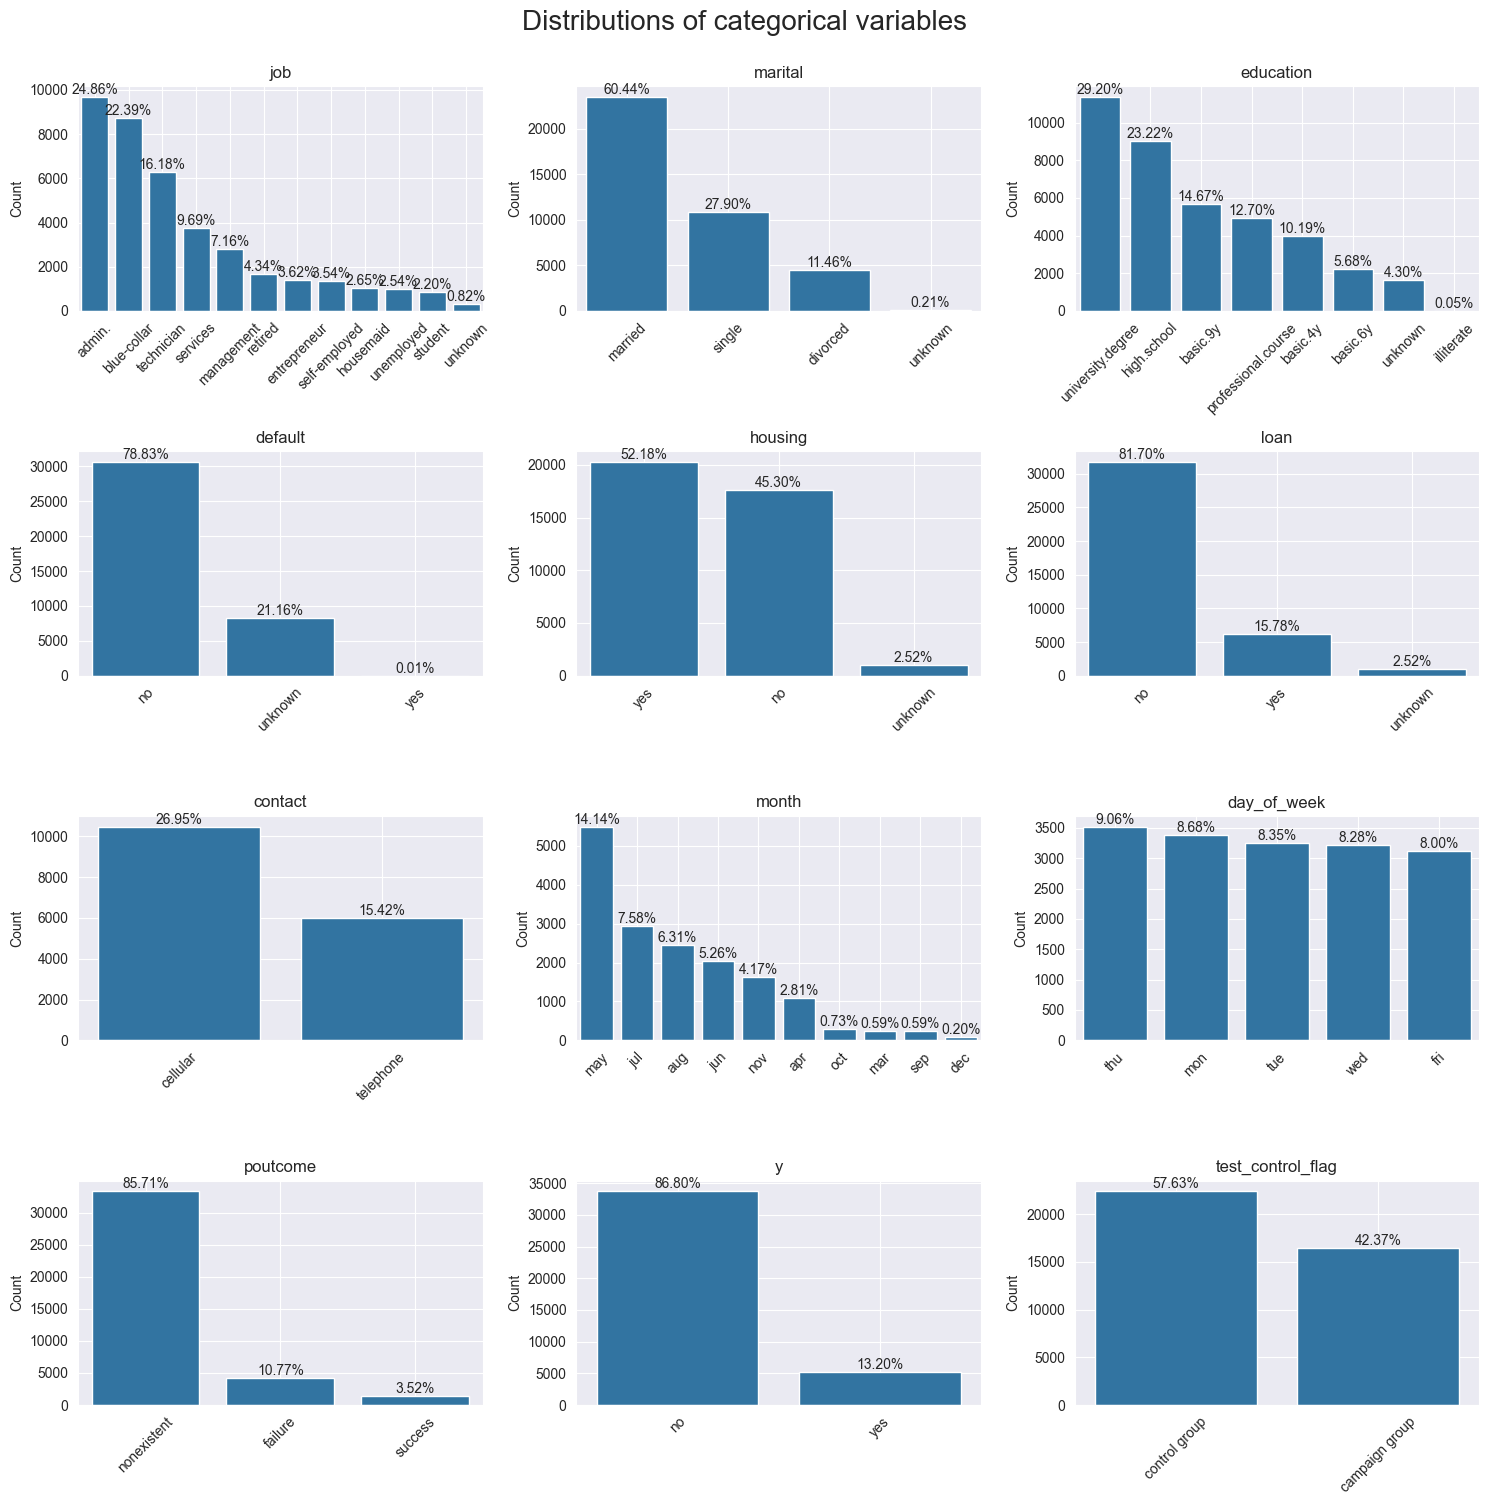

In [23]:
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[i], ax=ax, order=df[i].value_counts().index)
    ax.set_title(f"{i}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

    total = float(len(df[i]))
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height/total)*100:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom')

plt.suptitle('Distributions of categorical variables', size=20, y=1)
plt.tight_layout()
plt.show()

__The distribution of target 'y' across categorical variables with corresponding percentage value__

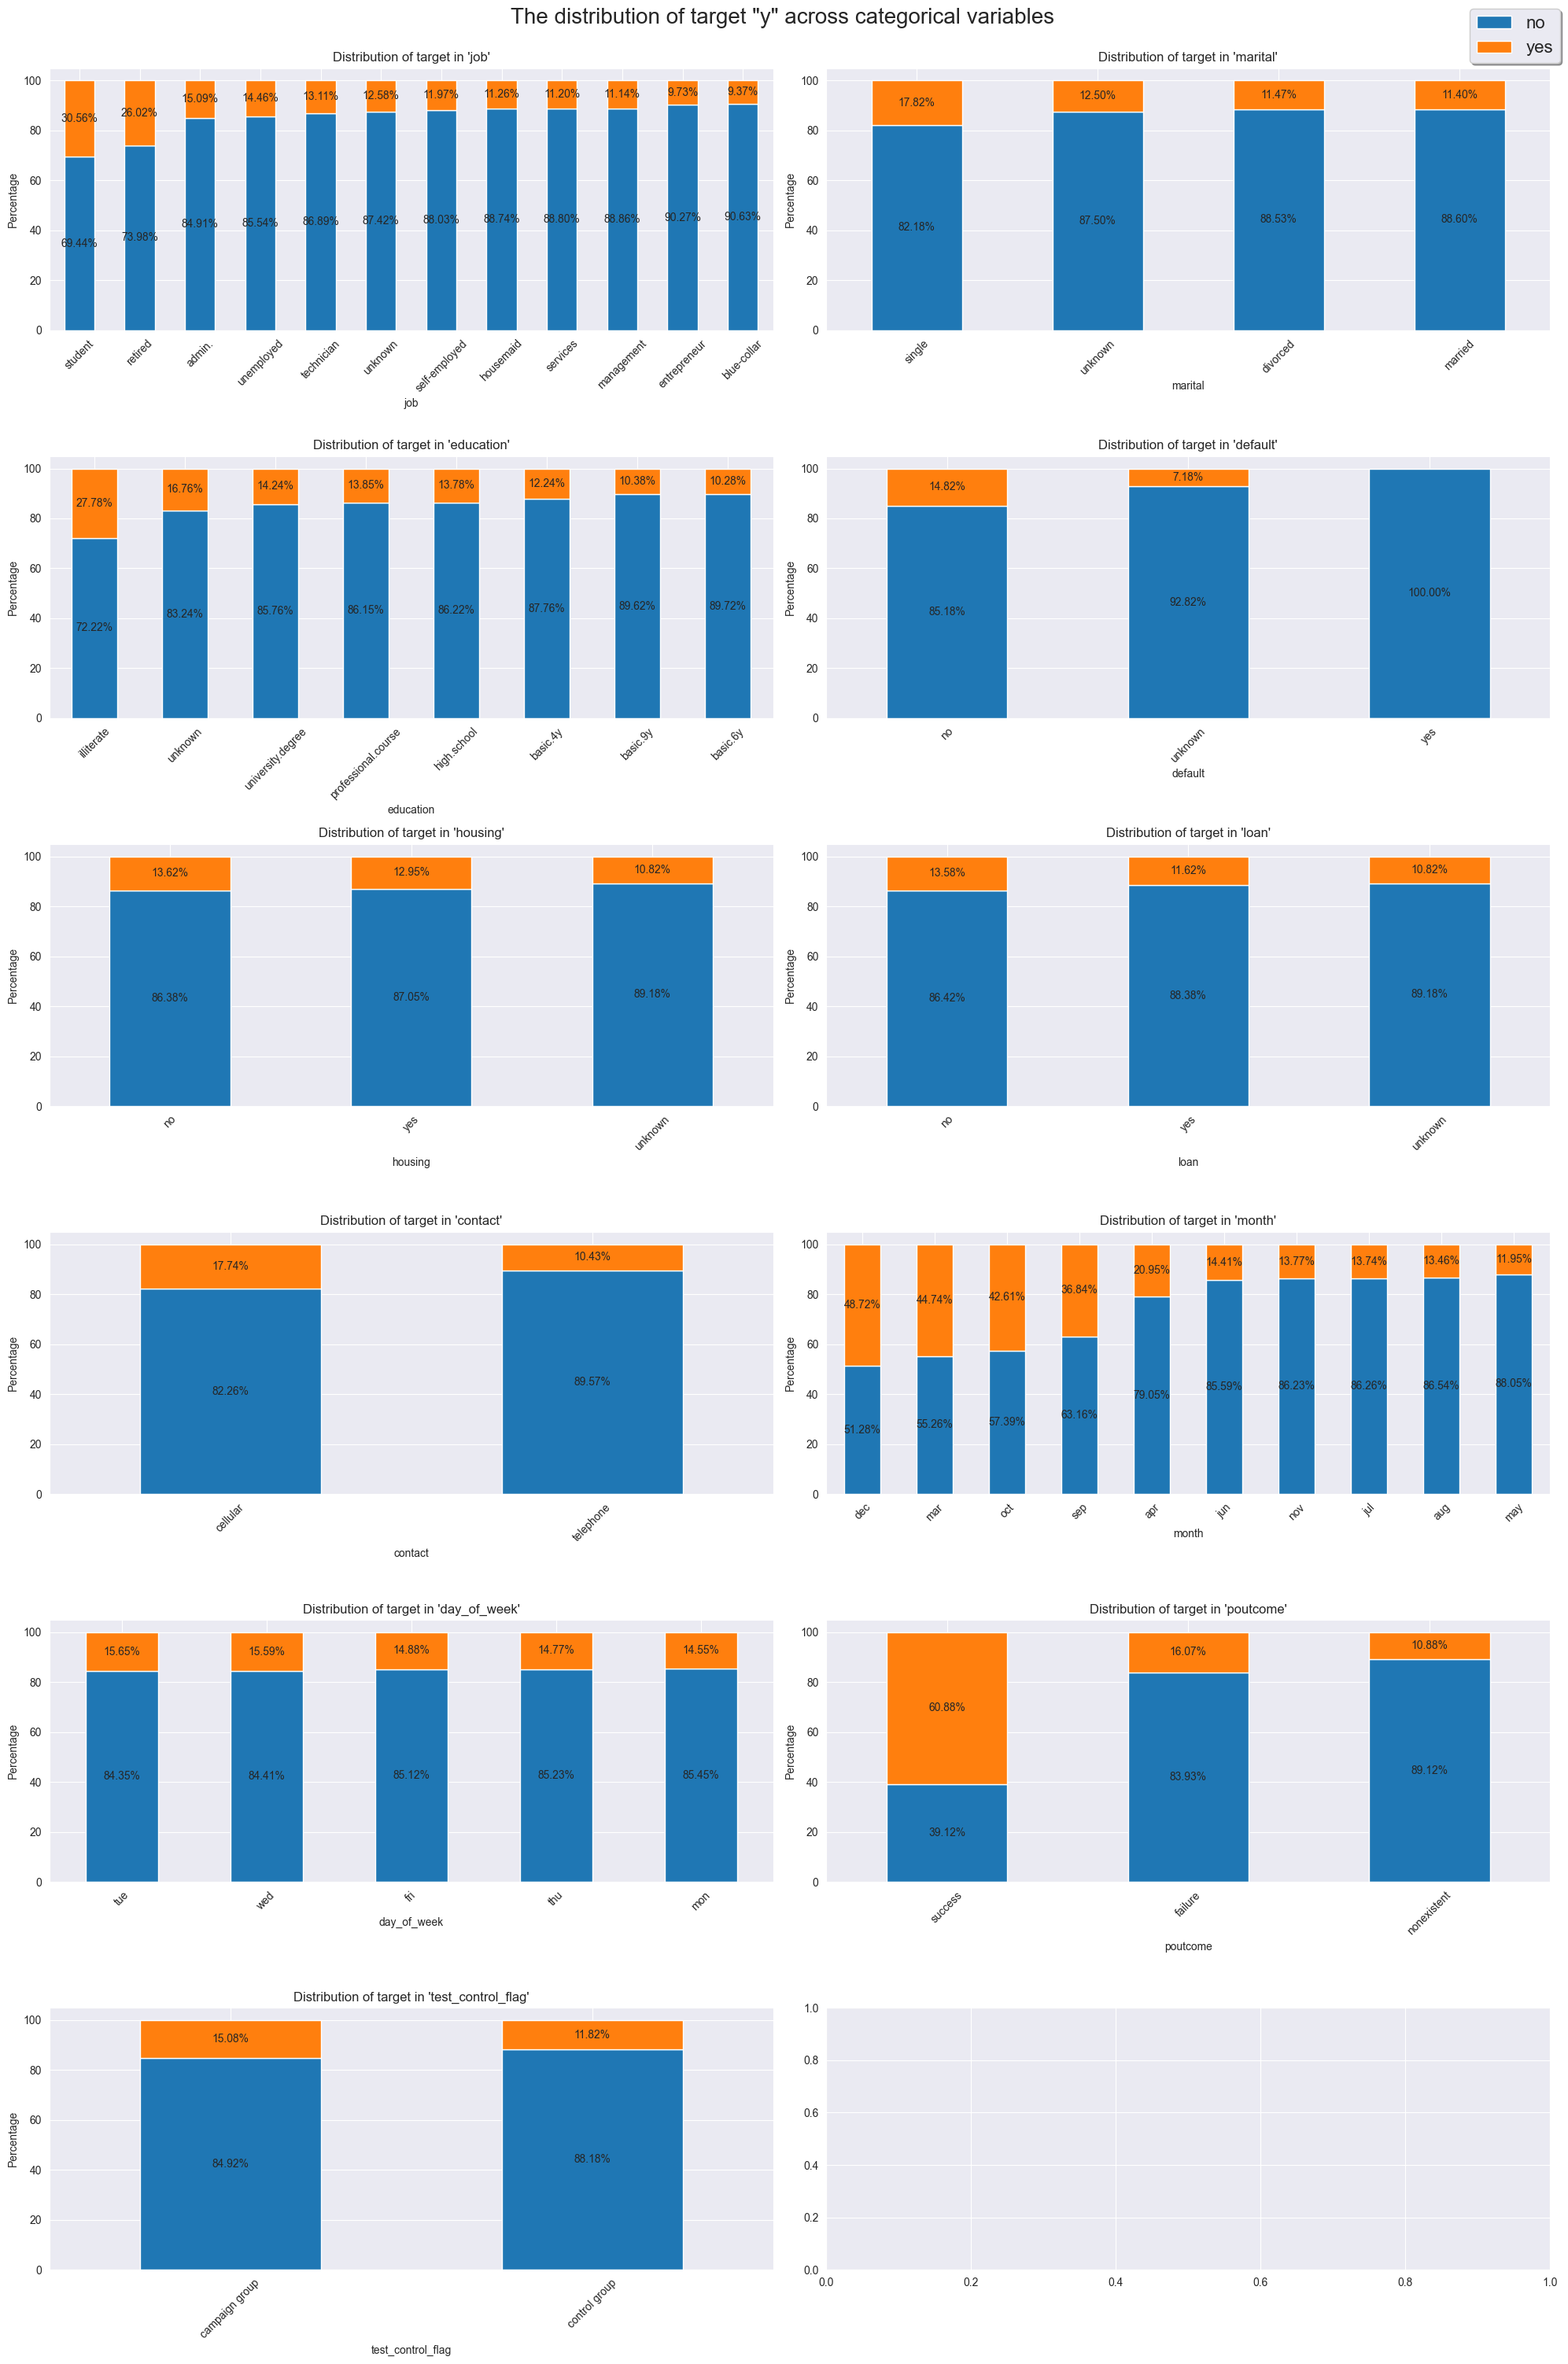

In [24]:
categorical_cols_temp = [col for col in categorical_cols if col != 'y']

num_cols = 2
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

for i, category in enumerate(categorical_cols_temp):

    category_distribution = df.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    category_distribution = category_distribution.sort_values(by='yes', ascending=False)
    
    row = i // num_cols
    col = i % num_cols

    ax = category_distribution.plot(kind='bar', stacked=True, ax=axes[row, col])
    ax.set_title(f"Distribution of target in '{category}'")
    ax.set_xlabel(category)
    ax.set_ylabel('Percentage')
    ax.legend().remove()
    ax.tick_params(axis='x', rotation=45)
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 16})

plt.suptitle('The distribution of target "y" across categorical variables', size=20, y=1)
plt.tight_layout()
plt.show()

### Comparative analysis between campaign and control

In [25]:
campaign_group = df_raw[df_raw['test_control_flag'] == 'campaign group']
control_group = df_raw[df_raw['test_control_flag'] == 'control group']

In [26]:
conversion_rate_campaign = campaign_group['y'].value_counts(normalize=True)['yes']
conversion_rate_control = control_group['y'].value_counts(normalize=True)['yes']
lift = (conversion_rate_campaign - conversion_rate_control) / conversion_rate_campaign

print(f"Conversion rate for campaign group: {conversion_rate_campaign:.2%}")
print(f"Conversion rate for control group: {conversion_rate_control:.2%}")
print(f"Lift: {lift:.2%}")

Conversion rate for campaign group: 15.08%
Conversion rate for control group: 10.86%
Lift: 27.96%


The following conversion rates mean that 15.08% of the entire campaign group and only 10.86% of the entire control group responded 'yes'
The lift of the current campaign is 27.96%, indicating that the campaign increased the conversion rate by approximately 28% compared to the control group.

In [27]:
campaign_group = df[df['test_control_flag'] == 'campaign group']
control_group = df[df['test_control_flag'] == 'control group']

In [28]:
campaign_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)
control_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)

__Comparison of categorical variable distributions between campaign and control groups__

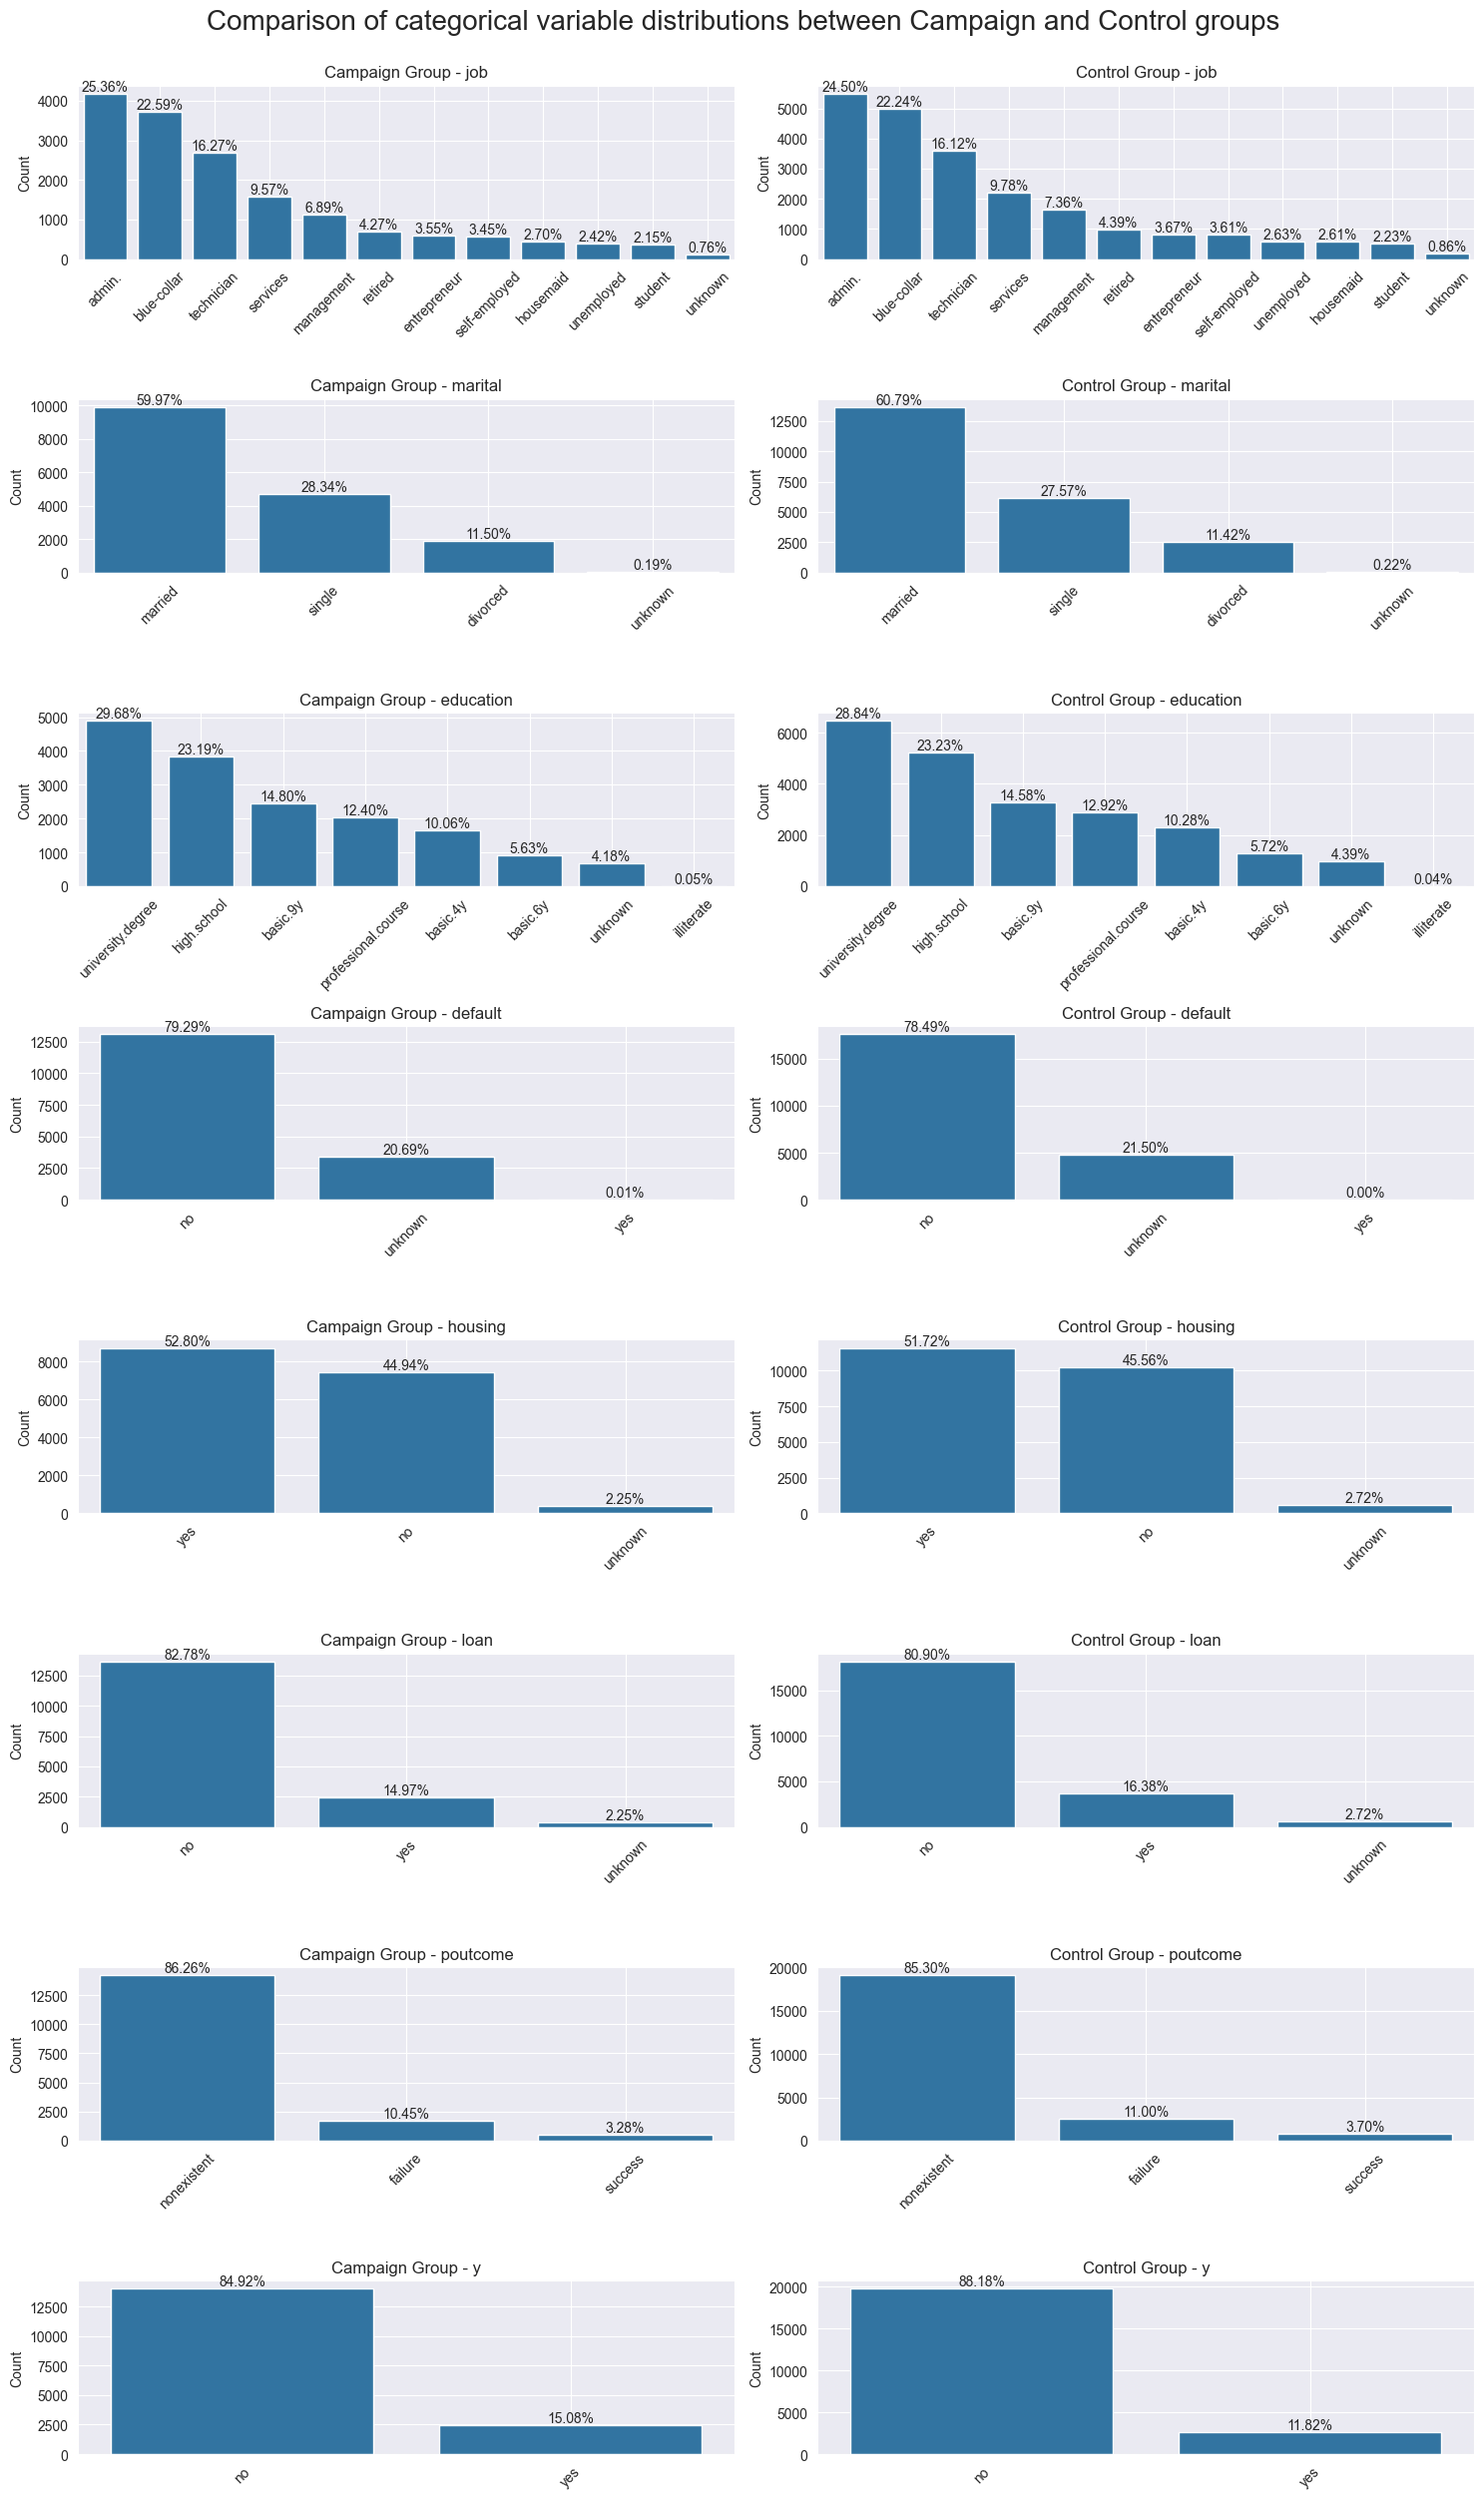

In [29]:
calegorical_cols_campaign_control = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

num_rows = len(calegorical_cols_campaign_control) 
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 25))

for i, col in enumerate(calegorical_cols_campaign_control):
    sns.countplot(x=col, data=campaign_group, ax=axes[i, 0], order=campaign_group[col].value_counts().index)
    axes[i, 0].set_title(f"Campaign Group - {col}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].grid(True)
    
    total_campaign = float(len(campaign_group[col]))
    for p in axes[i, 0].patches:
        height = p.get_height()
        axes[i, 0].annotate(f'{(height/total_campaign)*100:.2f}%', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom')

    sns.countplot(x=col, data=control_group, ax=axes[i, 1], order=control_group[col].value_counts().index)
    axes[i, 1].set_title(f"Control Group - {col}")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].grid(True)
    
    total_control = float(len(control_group[col]))
    for p in axes[i, 1].patches:
        height = p.get_height()
        axes[i, 1].annotate(f'{(height/total_control)*100:.2f}%', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom')

plt.suptitle('Comparison of categorical variable distributions between Campaign and Control groups', size=20, y=1)
plt.tight_layout()
plt.show()

__Comparison of target 'y' distribution across categorical variables between Campaign and Control groups__

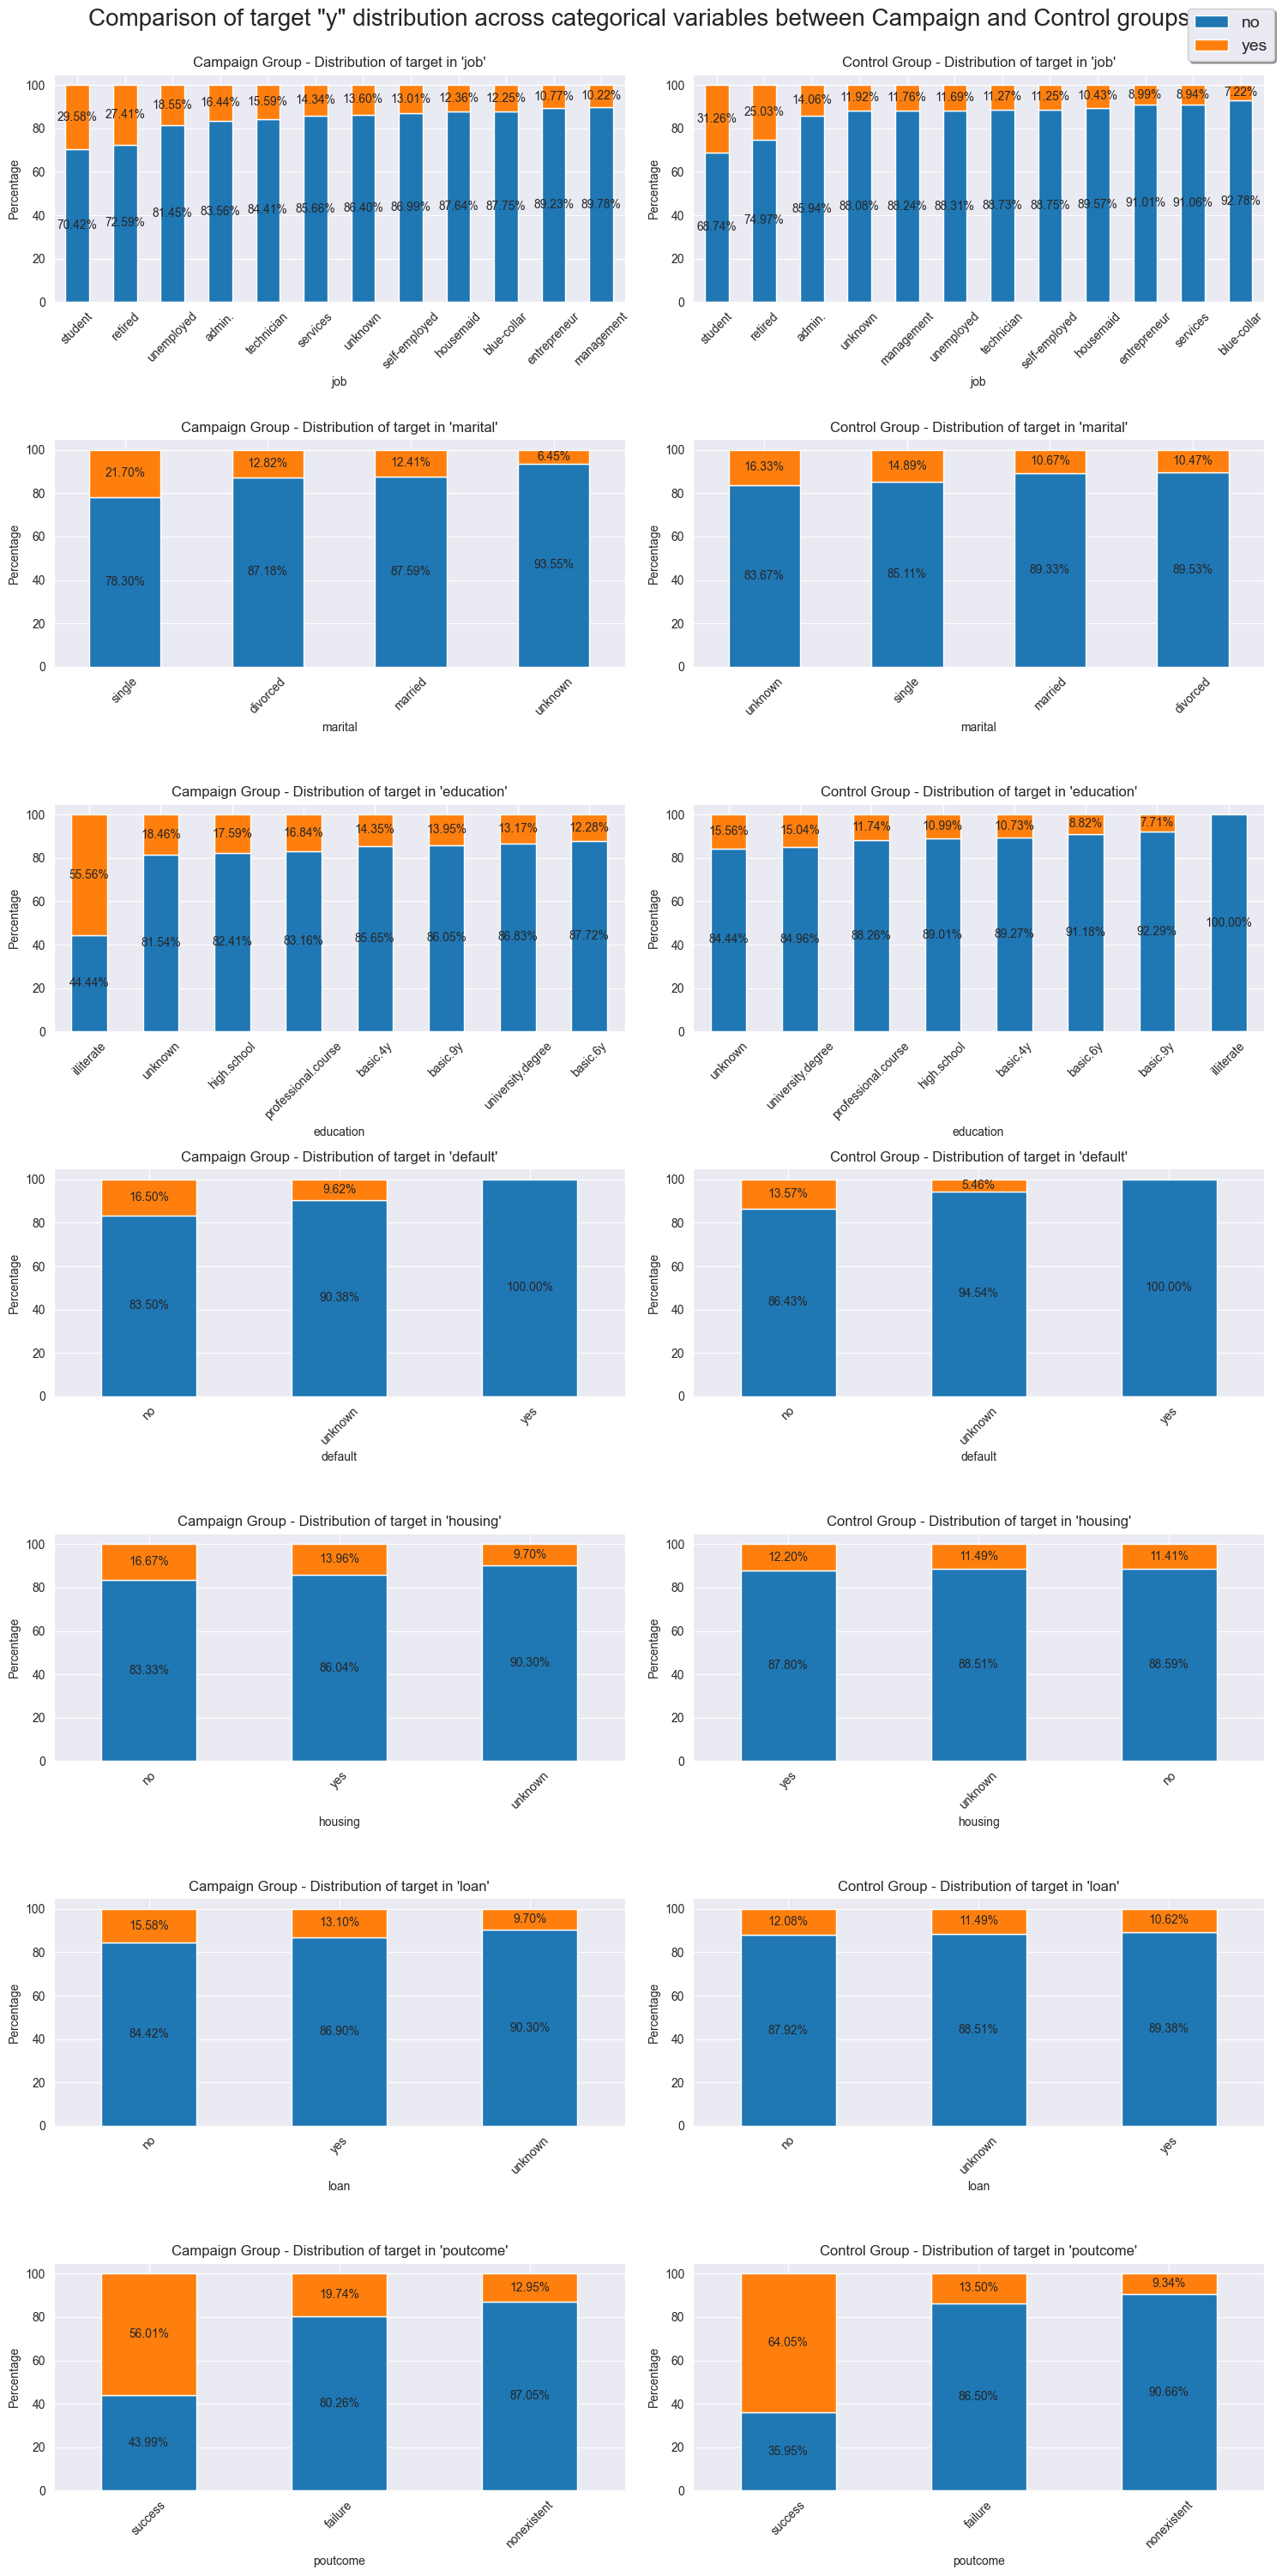

In [30]:
calegorical_cols_campaign_control_temp = [col for col in calegorical_cols_campaign_control if col != 'y']

num_cols = 2  
num_rows = (len(calegorical_cols_campaign_control_temp))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, category in enumerate(calegorical_cols_campaign_control_temp):
    # Calculate distribution for campaign group
    campaign_distribution = campaign_group.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    campaign_distribution = campaign_distribution.sort_values(by='yes', ascending=False)
    
    # Calculate distribution for control group
    control_distribution = control_group.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    control_distribution = control_distribution.sort_values(by='yes', ascending=False)
    
    # Plotting for campaign group in the current row
    ax_campaign = campaign_distribution.plot(kind='bar', stacked=True, ax=axes[i, 0])
    ax_campaign.set_title(f"Campaign Group - Distribution of target in '{category}'")
    ax_campaign.set_xlabel(category)
    ax_campaign.set_ylabel('Percentage')
    ax_campaign.legend().remove()
    ax_campaign.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar for campaign group
    for p in ax_campaign.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax_campaign.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    # Plotting for control group in the current row
    ax_control = control_distribution.plot(kind='bar', stacked=True, ax=axes[i, 1])
    ax_control.set_title(f"Control Group - Distribution of target in '{category}'")
    ax_control.set_xlabel(category)
    ax_control.set_ylabel('Percentage')
    ax_control.legend().remove()
    ax_control.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar for control group
    for p in ax_control.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax_control.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Add a single legend outside the subplots at the top
handles, labels = ax_campaign.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 14})

plt.suptitle('Comparison of target "y" distribution across categorical variables between Campaign and Control groups', size=20, y=1)
plt.tight_layout()
plt.show()

#### Comparison of numerical variable distribution between Campaign and Control groups by target 'y'

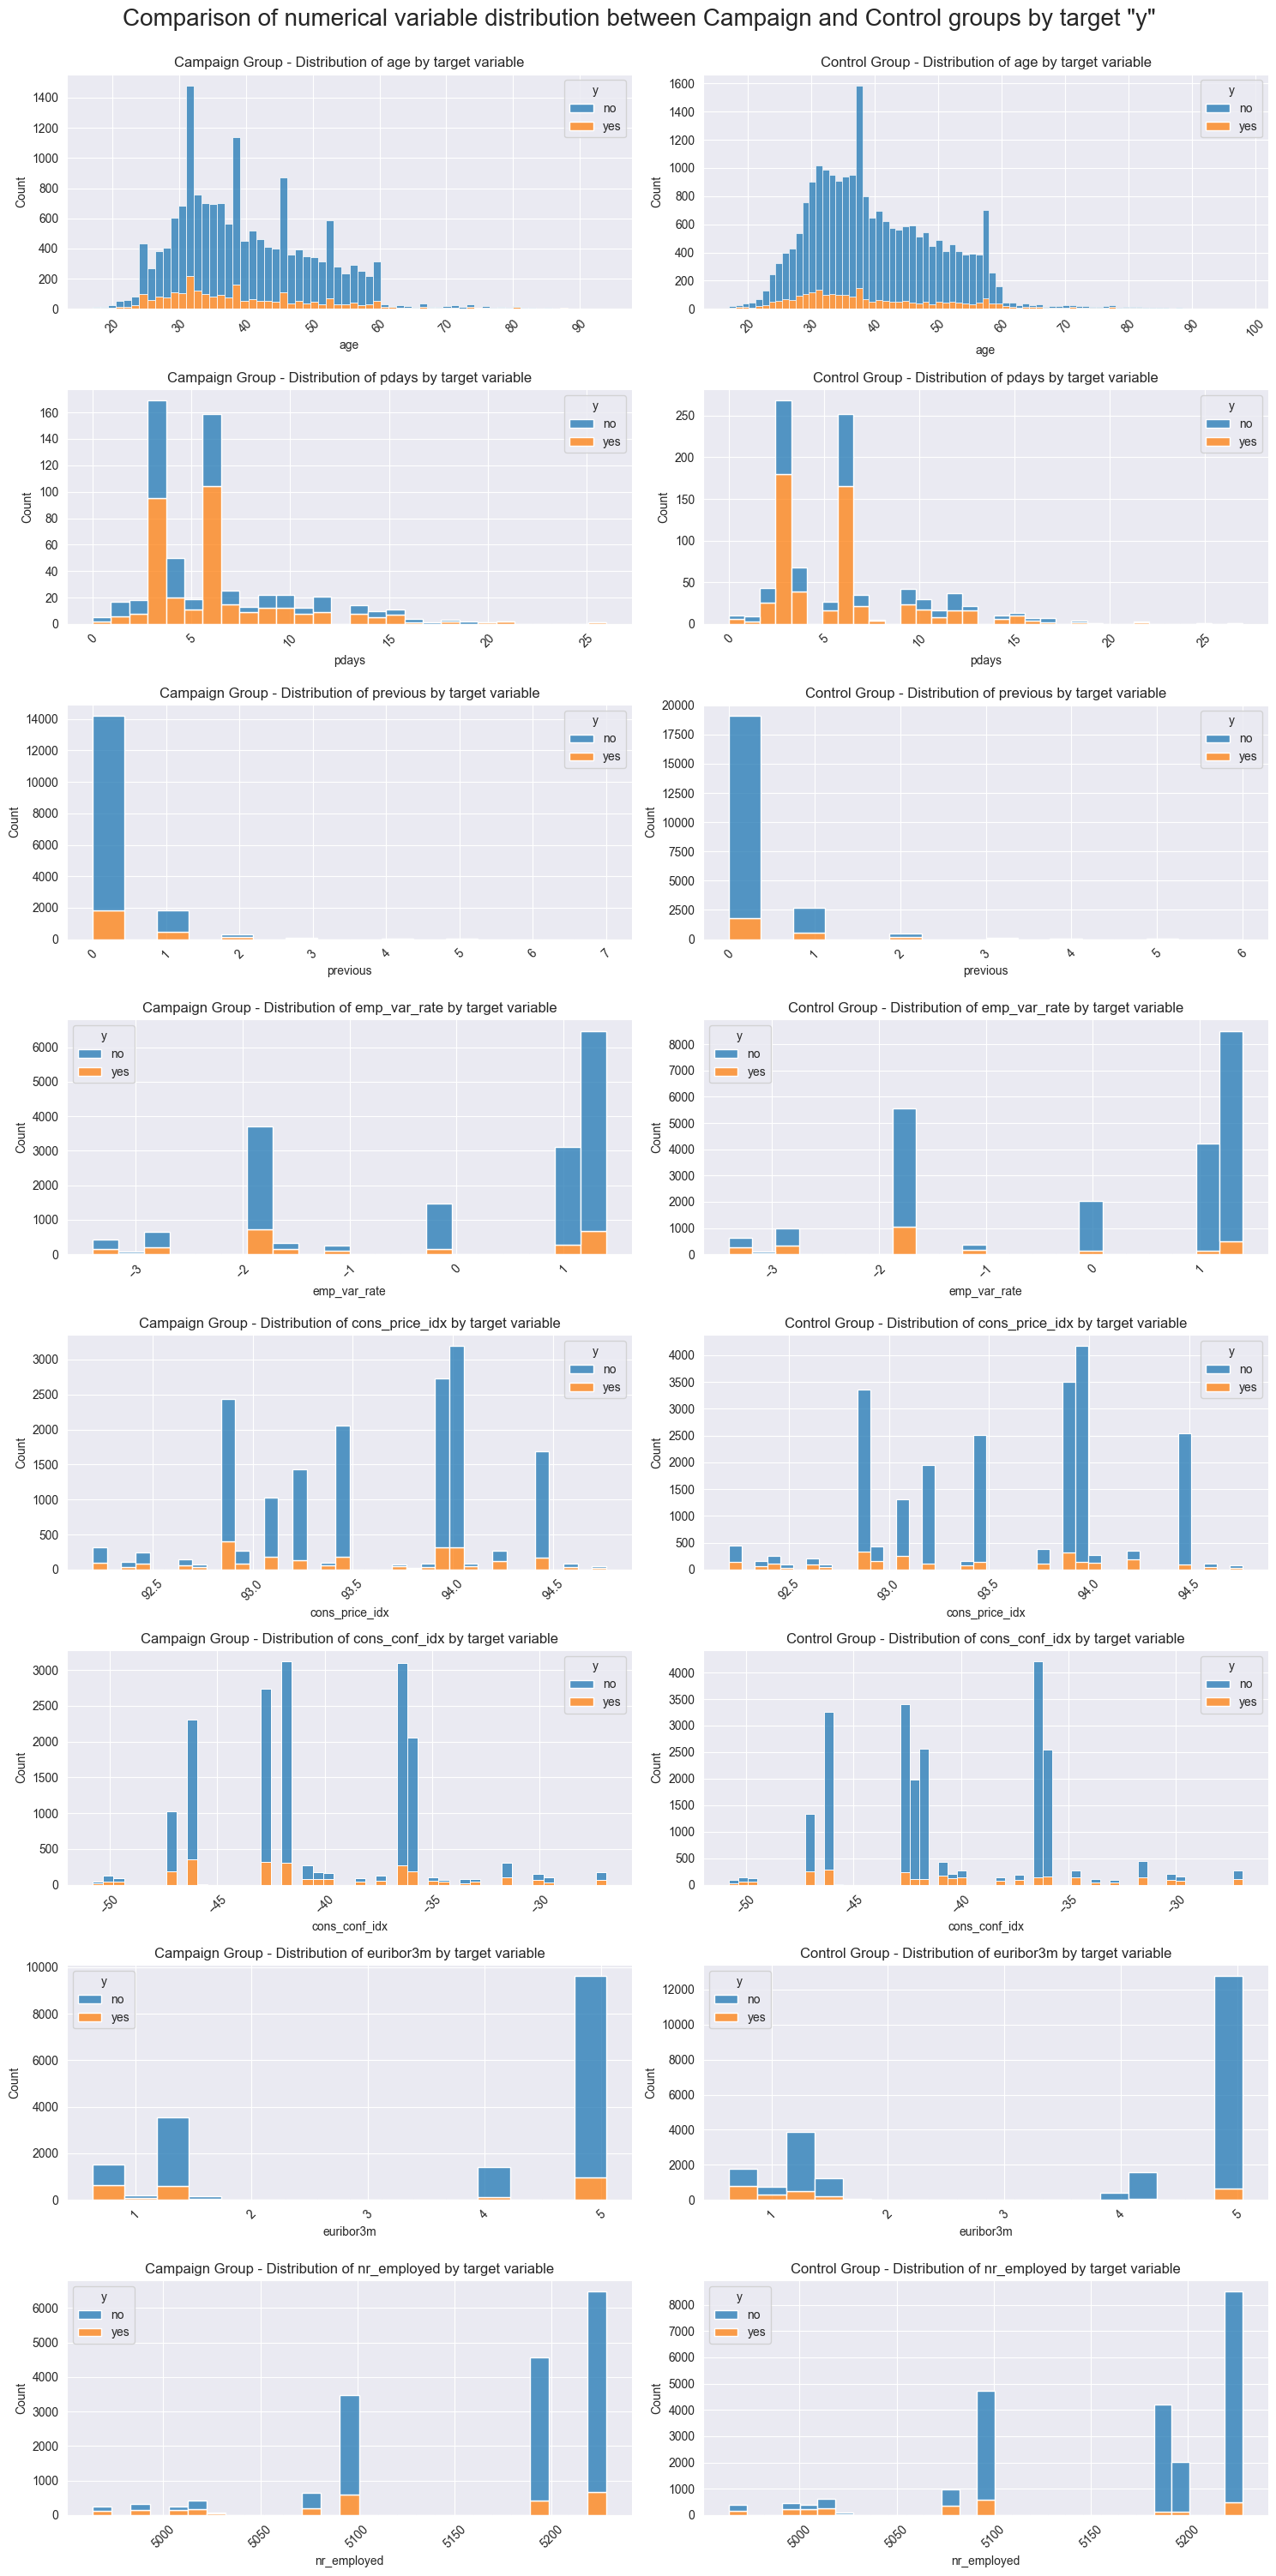

In [31]:
numeric_cols_campaign_control =  ['age', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

num_cols = 2  
num_rows = (len(numeric_cols_campaign_control))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, ax_row in enumerate(axes):
    # Campaign group 
    sns.histplot(data=campaign_group, x=numeric_cols_campaign_control[i], hue='y', multiple='stack', ax=ax_row[0])
    ax_row[0].set_title(f"Campaign Group - Distribution of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[0].set_xlabel(numeric_cols_campaign_control[i])
    ax_row[0].set_ylabel('Count')
    ax_row[0].tick_params(axis='x', rotation=45)

    # Control group 
    sns.histplot(data=control_group, x=numeric_cols_campaign_control[i], hue='y', multiple='stack', ax=ax_row[1])
    ax_row[1].set_title(f"Control Group - Distribution of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[1].set_xlabel(numeric_cols_campaign_control[i])
    ax_row[1].set_ylabel('Count')
    ax_row[1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparison of numerical variable distribution between Campaign and Control groups by target "y"', size=20, y=1)
plt.tight_layout()
plt.show()


#### Comparison of boxplots between Campaign and Control groups by target 'y'

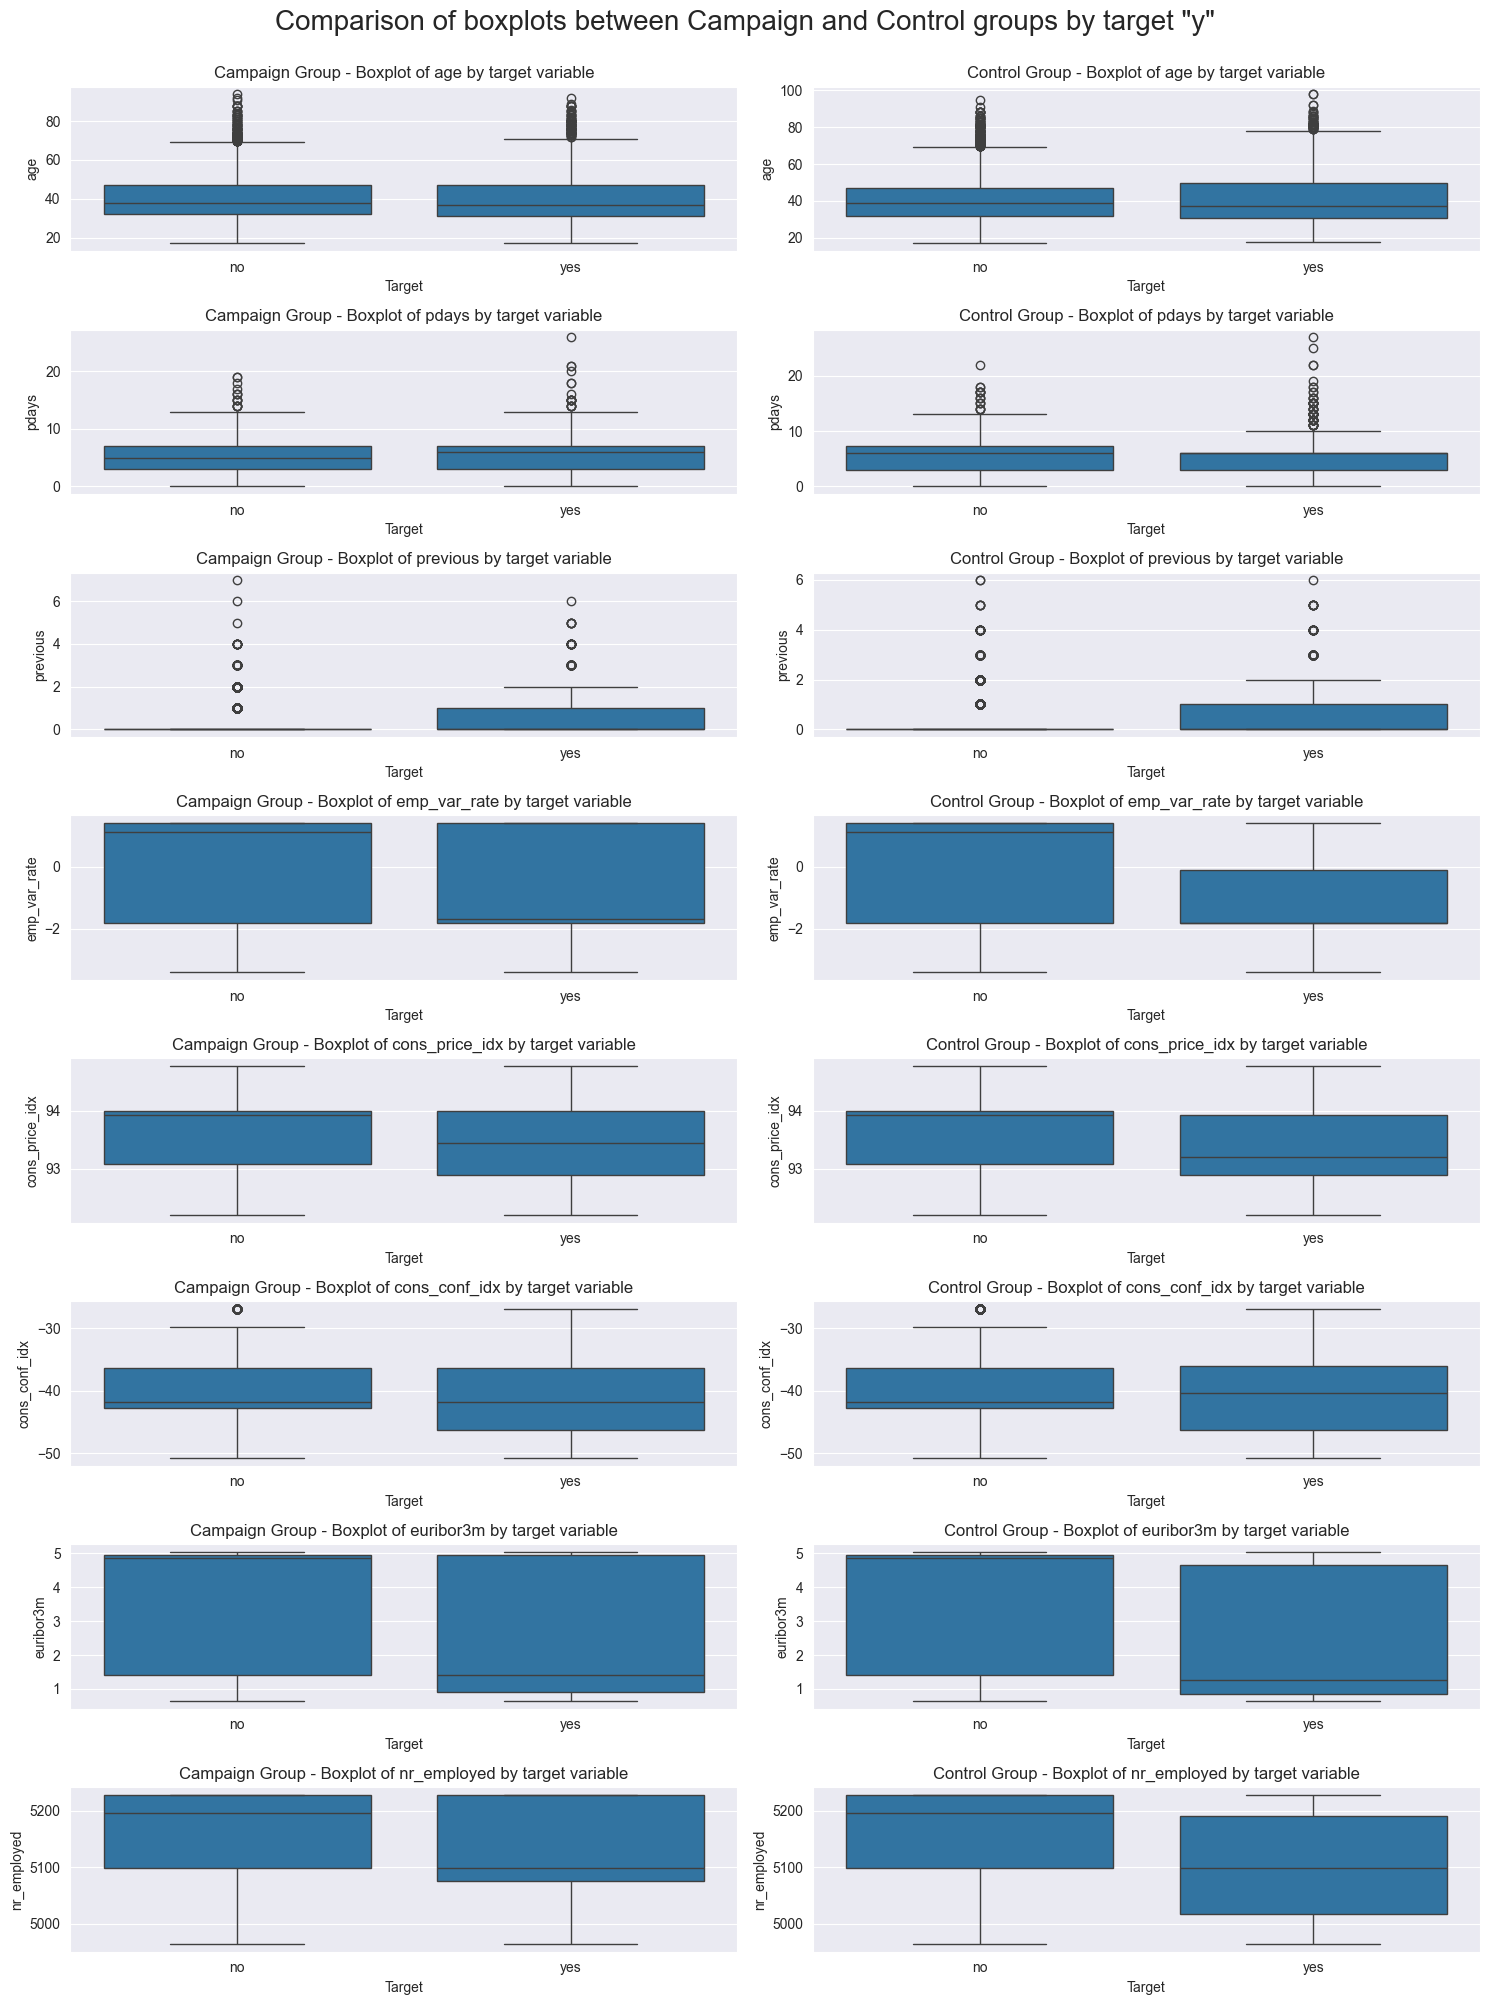

In [32]:
num_cols = 2  
num_rows = (len(numeric_cols_campaign_control))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, ax_row in enumerate(axes):
    sns.boxplot(data=campaign_group, x='y', y=numeric_cols_campaign_control[i], ax=ax_row[0])
    ax_row[0].set_title(f"Campaign Group - Boxplot of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[0].set_xlabel('Target')
    ax_row[0].set_ylabel(numeric_cols_campaign_control[i])

    sns.boxplot(data=control_group, x='y', y=numeric_cols_campaign_control[i], ax=ax_row[1])
    ax_row[1].set_title(f"Control Group - Boxplot of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[1].set_xlabel('Target')
    ax_row[1].set_ylabel(numeric_cols_campaign_control[i])

plt.suptitle('Comparison of boxplots between Campaign and Control groups by target "y"', size=20, y=1)
plt.tight_layout()
plt.show()


It is hard to retrieve information about the disribution of age by target variable from the histogram. Let's bucketize it based on quartiles.

In [33]:
age_quantiles = np.quantile(df['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [34]:
bins = [17, 32, 47, 70, 98]
labels = ['[17, 32]', '(32, 47]', '(47, 70]', '(70, 98]']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [35]:
campaign_group['age'].describe()

count    16474.000000
mean        39.988042
std         10.489196
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         94.000000
Name: age, dtype: float64

In [36]:
bins = [0, 32, 47, 70, 94]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 94]']

campaign_group['age'] = pd.cut(campaign_group['age'], bins=bins, labels=labels, right=False)

In [37]:
control_group['age'].describe()

count    22408.000000
mean        40.280391
std         10.494174
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [38]:
bins = [0, 32, 47, 70, 98]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 98]']
control_group['age'] = pd.cut(control_group['age'], bins=bins, labels=labels, right=False)

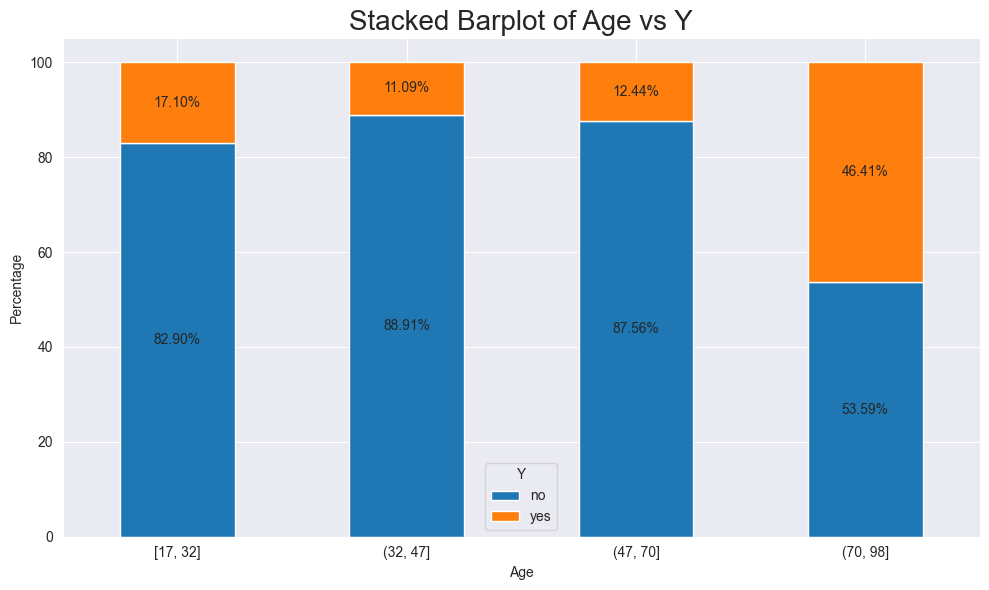

In [39]:
category_distribution = df.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)

ax = category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Barplot of Age vs Y', size = 20)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Y')
plt.xticks(rotation=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout() 
plt.show()

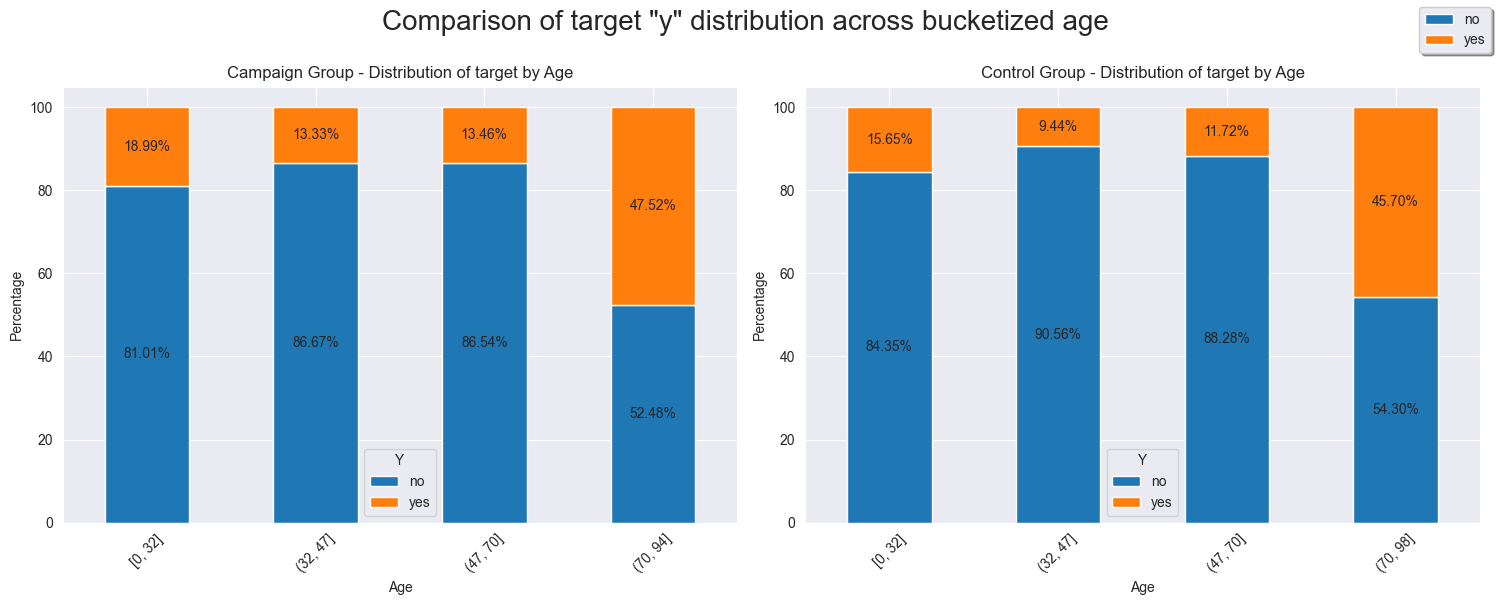

In [40]:
category_distribution_campaign = campaign_group.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
category_distribution_control = control_group.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting for campaign group
ax_campaign = category_distribution_campaign.plot(kind='bar', stacked=True, ax=axes[0])
ax_campaign.set_title("Campaign Group - Distribution of target by Age")
ax_campaign.set_xlabel('Age')
ax_campaign.set_ylabel('Percentage')
ax_campaign.legend(title='Y')
ax_campaign.tick_params(axis='x', rotation=45)

# Add percentage labels on each bar for campaign group
for p in ax_campaign.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax_campaign.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Plotting for control group
ax_control = category_distribution_control.plot(kind='bar', stacked=True, ax=axes[1])
ax_control.set_title("Control Group - Distribution of target by Age")
ax_control.set_xlabel('Age')
ax_control.set_ylabel('Percentage')
ax_control.legend(title='Y')
ax_control.tick_params(axis='x', rotation=45)

# Add percentage labels on each bar for control group
for p in ax_control.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax_control.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Add a single legend outside the subplots at the top
handles, labels = ax_campaign.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 10})

plt.suptitle('Comparison of target "y" distribution across bucketized age', size=20, y=1)
plt.tight_layout()
plt.show()

## Feature Engineering 

In [41]:
df_raw = df_raw.rename(columns={df_raw.columns[0]: 'client_id'})

In [42]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df_raw = df_raw.rename(columns = dict)

In [43]:
df_raw['pdays'].replace(999, np.nan, inplace = True)

In [44]:
quantiles = df_raw['pdays'].quantile([0, 0.25, 0.5, 0.75, 1.0])
quantiles

0.00     0.0
0.25     3.0
0.50     6.0
0.75     7.0
1.00    27.0
Name: pdays, dtype: float64

In [45]:
bins = [0, 3, 6, 12, 27]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['pdays'] = pd.cut(df_raw['pdays'], bins=bins, labels=labels, right=False)

In [46]:
df_raw['pdays'] = df_raw['pdays'].cat.add_categories('missing').fillna('missing')

In [47]:
age_quantiles = np.quantile(df_raw['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [48]:
bins = [17, 32, 38, 47, 99]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['age'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

In [49]:
df_raw['age'].value_counts()

age
Q4    10801
Q3    10619
Q2    10438
Q1     9330
Name: count, dtype: int64

In [50]:
df_clean = df_raw.copy()

In [53]:
df_clean.pdays.value_counts()

pdays
missing    39674
Q3           634
Q2           603
Q4           175
Q1           102
Name: count, dtype: int64